# College Basketball Conferences
## Memphis Lau

Every year, once March comes around, we all fill out our brackets, most of us doing so blindly and without knowledge of how exactly the tournament works. This article aims to explain how conferences play into the tournament, determine which conferences are worth watching, and explore trends between high-major conferences and mid-major conferences.

## How Do Conferences Work?

In Division I College Basketball, there are 352 teams, each placed into one of the 32 conferences (or leagues) around the nation. These designations are mostly regional. They dictate a team's schedule, as they will play a majority of its games throughout the season strictly against teams in its own conference. 

At the end of the season, every conference has a tournament within itself, with seeding based on the teams' records against each other in league play. The winner of these tournaments win a guaranteeed spot into the now 68-team March Madness bracket and a chance to win the National Championship. That means 32 of the 68 teams in the tournament are locked first. The other 36 teams are chosen from any conference in the nation, chosen by a panel. 

This means every conference will be represented by at least one team every year.

### Reading in and Cleaning Data

In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
data = pd.read_csv("alldataclean.csv")

Our dataset contains every college team, its conference, season statistics, and postseason results from the last 10 seasons (9 tournaments because the 2020 tournament was cancelled).

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3160 entries, 0 to 3159
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        3160 non-null   object 
 1   CONF        3160 non-null   object 
 2   G           3160 non-null   int64  
 3   W           3160 non-null   int64  
 4   ADJOE       3160 non-null   float64
 5   ADJDE       3160 non-null   float64
 6   BARTHAG     3160 non-null   float64
 7   EFG_O       3160 non-null   float64
 8   EFG_D       3160 non-null   float64
 9   TOR         3160 non-null   float64
 10  TORD        3160 non-null   float64
 11  ORB         3160 non-null   float64
 12  DRB         3160 non-null   float64
 13  FTR         3160 non-null   float64
 14  FTRD        3160 non-null   float64
 15  2P_O        3160 non-null   float64
 16  2P_D        3160 non-null   float64
 17  3P_O        3160 non-null   float64
 18  3P_D        3160 non-null   float64
 19  ADJ_T       3160 non-null  

As we can see, there are no missing data, except for when teams do not make the postseason tournament. We have 612 teams that did make the postseason, and the 2500+ teams in our dataset that did not make the tournament have missing values in the "POSTSEASON" and "YEAR" columns.

Because we are analyzing college basketball conferences, it is important that our dataset represents those corectly.

In [3]:
print(data.CONF.unique())
print(data.CONF.nunique())

['WCC' 'Amer' 'B12' 'ACC' 'SEC' 'BE' 'P12' 'B10' 'MWC' 'MVC' 'A10' 'OVC'
 'CUSA' 'AE' 'SC' 'WAC' 'Sum' 'CAA' 'MAAC' 'MAC' 'Ivy' 'ASun' 'Pat' 'SB'
 'BW' 'BSth' 'BSky' 'NEC' 'Horz' 'SWAC' 'MEAC' 'Slnd' 'Ind' 'ind' 'GWC']
35


This dataset has 35 unique values for conferences. This is because it represents teams that are Independent (belong to no conference) and the Great West Conference (GWC), which stopped existing after 2013. For the sake of our project staying within the 32 conferences that we have now, we will remove all teams that didn't belong to a conference or belonged to the GWC.

In [4]:
unwanted_data = data[data['CONF'].isin(['Ind', 'ind', 'GWC'])].index
data.drop(unwanted_data, inplace = True)

In [5]:
data.CONF.nunique()

32

Another important column is the 'POSTSEASON' column. Let's take a look:

In [6]:
data.POSTSEASON.unique()

array(['S16', 'E8', 'Champions', 'R32', 'F4', 'R64', '2ND', nan, 'R68'],
      dtype=object)

We see that this dataset uses abbreviations to classify which round the team made it to before losing. All teams that did not make the postseason have a missing value in this column. To make visualization easier, we will create a column that simply tells if a team made the postseason or not.

In [7]:
data['TOURNEY'] = list(map(lambda x: not x, data.POSTSEASON.isnull()))

We also want to create an order amongst the results from the postseason.

In [8]:
cat_type = CategoricalDtype(categories=['R68', 'R64', 'R32', 'S16', 'E8', 'F4', '2ND', 'Champions'], ordered=True)
data.POSTSEASON = data.POSTSEASON.astype(cat_type)

### Conference Watch

In [9]:
team_count = data.groupby('CONF').TEAM.count()
tourney_count = data.groupby('CONF').TOURNEY.sum()

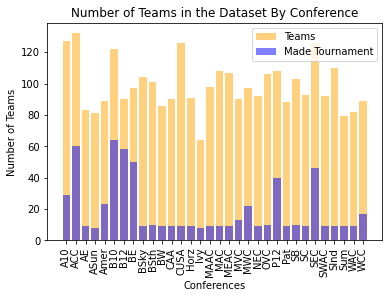

In [10]:
plt.bar(team_count.index, height = team_count, color = 'orange', alpha = 0.5, label = 'Teams')
plt.bar(tourney_count.index, height = tourney_count, color = 'blue', alpha = 0.5, label = 'Made Tournament')
plt.xticks(rotation = 90)
plt.legend()
plt.title("Number of Teams in the Dataset By Conference")
plt.xlabel("Conferences")
plt.ylabel("Number of Teams")
plt.show()

Worth noting: Ivy League only has 8 appearances in the 9 years because they shut down all sports during the pandemic and thus could not send any team to the tournament in 2021. This dataset does not have the Liberty team that represented the ASun conference in 2019, so the ASun only has 8 tournament teams in our data. Every other team has at least 9 appearances in the tournament over the last 9 eligible seasons, as expected.

We see that the number of teams represented in the data is relatively standard throughout all the different conferences. However, the number of teams that have made the tournament spike in 6 conferences. Let's explore these six.

In [11]:
tourney_count.sort_values(ascending = False)[0:6]

CONF
B10    64
ACC    60
B12    58
BE     50
SEC    46
P12    40
Name: TOURNEY, dtype: int64

These 6 conferences are known as "high-major" conferences. They are the Big 10, the Atlantic Coast Conference, the Big 12, the Big East, the Southeastern conference, and the Pacific 12. 
More importantly for us, UCLA belongs to the Pac-12. However, in a couple years, UCLA will move conferences to the Big 10.

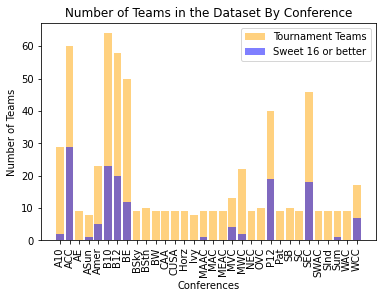

In [12]:
s16_count = data[data.POSTSEASON >= 'S16'].groupby('CONF').TEAM.count()
plt.bar(tourney_count.index, height = tourney_count, color = 'orange', alpha = 0.5, label = 'Tournament Teams')
plt.bar(s16_count.index, height = s16_count, color = 'blue', alpha = 0.5, label = 'Sweet 16 or better')
plt.xticks(rotation = 90)
plt.legend()
plt.title("Number of Teams in the Dataset By Conference")
plt.xlabel("Conferences")
plt.ylabel("Number of Teams")
plt.show()

If we look at just teams that have made the Sweet 16 in the last 9 tournaments, we again see the clear divide between the top 6 and the rest of the field again.

## High-Major Conferences vs Mid-Major Conferences

In [13]:
high_major_idx = data[data.CONF.isin(['ACC', 'B10', 'B12', 'BE', 'P12', 'SEC'])].index
high_major = data.loc[high_major_idx, :]
mid_major = data.loc[data.index.difference(high_major_idx), :]

### Regular Season

In [14]:
high_major_avg = np.mean(high_major.iloc[:, 4:19], axis = 0)
mid_major_avg = np.mean(mid_major.iloc[:, 4:19], axis = 0)
avgs = pd.concat([high_major_avg, mid_major_avg], axis = 1)
avgs.columns = ['High Major', 'Mid Major']

In [15]:
avgs

,High Major,Mid Major
ADJOE,110.439852,101.089580
ADJDE,96.452296,104.858118
BARTHAG,0.793378,0.413465
EFG_O,50.663852,49.612964
EFG_D,48.487704,50.464782
TOR,17.967259,18.950040
TORD,18.600148,18.684087
ORB,31.194074,28.930048
DRB,29.482815,29.659935
FTR,35.281333,34.736349


This table shows us that high-major teams simply are better on average than mid-major teams. Across all significant statistical factors, high-major teams have mid-major teams beat. They have a higher offensive efficiency, while having a better defensive efficiency, as well. The graph below helps us visualize this better. They turn the ball over less. However, shooting numbers are relatively even. The largest difference is in the BARTHAG score: their power rating (chances of beating an average DI team). The averages between the two types of conferences differs by almost 48%.

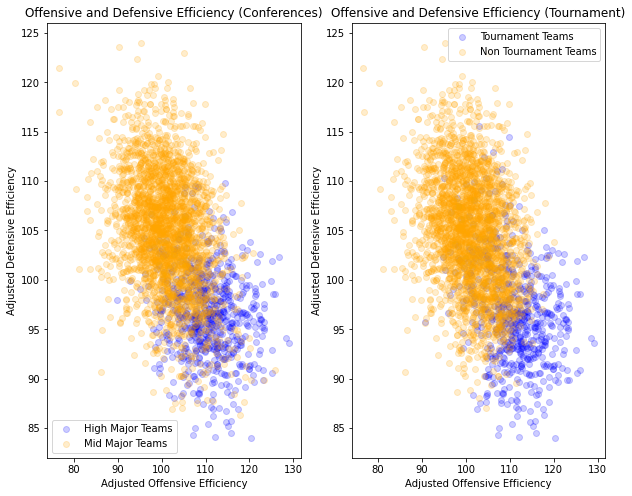

In [16]:
plt.figure(figsize = (10, 8))
plt.subplot(1,2,1)
plt.scatter(high_major.ADJOE, high_major.ADJDE, color = 'blue', label = 'High Major Teams', alpha = 0.2)
plt.scatter(mid_major.ADJOE, mid_major.ADJDE, color = 'orange', label = "Mid Major Teams", alpha = 0.2)
plt.xlabel("Adjusted Offensive Efficiency")
plt.ylabel("Adjusted Defensive Efficiency")
plt.title("Offensive and Defensive Efficiency (Conferences)")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(data[data.TOURNEY == 1].ADJOE, data[data.TOURNEY == 1].ADJDE, color = 'blue', label = 'Tournament Teams', alpha = 0.2)
plt.scatter(data[data.TOURNEY == 0].ADJOE, data[data.TOURNEY == 0].ADJDE, color = 'orange', label = "Non Tournament Teams", alpha = 0.2)
plt.xlabel("Adjusted Offensive Efficiency")
plt.ylabel("Adjusted Defensive Efficiency")
plt.title("Offensive and Defensive Efficiency (Tournament)")
plt.legend()

plt.show()

As we can see, a high-major team on average has better adjusted offensive efficency and defensive efficiency than a mid-major team. Not coincidentally, when we plot the same parameters and separate by tournament teams and non-tournament teams, the graphs are strikingly similar. It leads us to exploring the disparities in the postseason.

### Postseason Consistency

In [17]:
high_major_tourney = high_major.groupby('TEAM').TOURNEY.sum()
mid_major_tourney = mid_major.groupby('TEAM').TOURNEY.sum()
hm_array = []
mm_array = []
for i in range(5,10):
    hm_array.append(sum(high_major_tourney >= i))
    mm_array.append(sum(mid_major_tourney >= i))

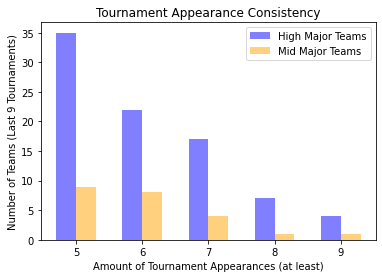

In [18]:
ind = np.arange(5)
width = 0.3
plt.bar(ind, hm_array , width, label='High Major Teams', color = 'blue', alpha = 0.5)
plt.bar(ind + width, mm_array, width, label='Mid Major Teams', color = 'orange', alpha = 0.5)
plt.xlabel('Amount of Tournament Appearances (at least)')
plt.ylabel('Number of Teams (Last 9 Tournaments)')
plt.title('Tournament Appearance Consistency')
plt.xticks(ind + width / 2, ('5', '6', '7', '8', '9'))
plt.legend(loc='best')
plt.show()

This graph shows how many teams have made the tournament at least n times in the last 9 years (for 5 <= n <= 9). We see that there are many more "consistent" teams in high major leagues. This is made even more significant by the fact that the dataset has more than 3 times more mid-major teams than high-major teams.

### Postseason Success: Seeding

In [19]:
high_major_post = high_major[high_major.TOURNEY == True]
mid_major_post = mid_major[mid_major.TOURNEY == True]

In [20]:
high_major_seeding = np.mean(high_major_post.SEED)
mid_major_seeding = np.mean(mid_major_post.SEED)

In [21]:
print("Average Seeding for High Major Teams: ", high_major_seeding)
print("Average Seeding for Mid Major Teams: ", mid_major_seeding)

Average Seeding for High Major Teams:  5.933962264150943
Average Seeding for Mid Major Teams:  11.904761904761905


As expected, because high major teams are typically better than low major teams, they get seeded higher in the tournament when they make it.

In [22]:
double_digit_seed_hm = len(high_major_post[high_major_post.SEED >= 10]) / len(high_major_post)
double_digit_seed_mm = len(mid_major_post[mid_major_post.SEED >= 10]) / len(mid_major_post)
print("Proportions of High Major Teams with Double Digit Seed: ", double_digit_seed_hm)
print("Proportions of Mid Major Teams with Double Digit Seed: ", double_digit_seed_mm)

Proportions of High Major Teams with Double Digit Seed:  0.19811320754716982
Proportions of Mid Major Teams with Double Digit Seed:  0.7687074829931972


In fact, less than 20% of tournament high major conference teams are seeded 10 and below, while over 75% of mid-major schools are. As by the nature of the tournament, it is much more difficult to advance far if a team is seeded lower.

The following graphic shows a better picture of how the seeding is distributed.

In [23]:
seeding = data[data.TOURNEY == True].groupby('SEED').TEAM.count()
high_major_seeding = high_major_post.groupby('SEED').TEAM.count()

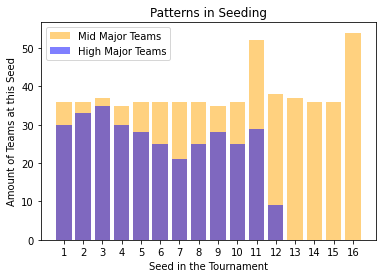

In [24]:
plt.bar(seeding.index, seeding, color = 'orange', alpha = 0.5, label = 'Mid Major Teams')
plt.bar(high_major_seeding.index, high_major_seeding, color = 'blue', alpha = 0.5, label = 'High Major Teams')
plt.xlabel("Seed in the Tournament")
plt.ylabel("Amount of Teams at this Seed")
plt.title("Patterns in Seeding")
plt.legend()
plt.xticks(seeding.index)
plt.show()

This graph reveals interesting patterns in tournament seeding with regards to high major teams and mid major teams. For those that do not know, there are spikes in the amount of 11 seeds and 16 seeds because there are 6 of each in every tournament, as opposed to the 4 of every other seed. 

It is interesting to see that no high major team has been seeded 13 or worse in any of the past 9 tournaments. It is also worth exploring why the peak of the ratio of high major teams at the seed is at the 3 seed line, instead of the 1 seed. 

### Postseason Success: Results

In [25]:
high_major_results = high_major_post.groupby('POSTSEASON').TEAM.count()
mid_major_results = mid_major_post.groupby('POSTSEASON').TEAM.count()
total_count = data.groupby('POSTSEASON').TEAM.count()

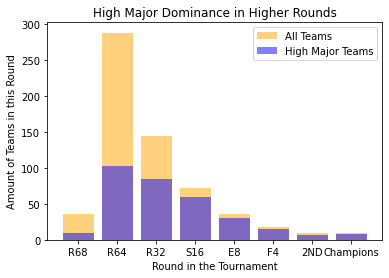

In [26]:
plt.bar(total_count.index, total_count, color = 'orange', alpha = 0.5, label = 'All Teams')
plt.bar(high_major_results.index, high_major_results, color = 'blue', alpha = 0.5, label = 'High Major Teams')
plt.xlabel("Round in the Tournament")
plt.ylabel("Amount of Teams in this Round")
plt.title("High Major Dominance in Higher Rounds")
plt.legend()
plt.show()

As expected, because of the higher seeding and better play, high-major teams are much more likely to make it far in the tournament. The following graphic will prove that.

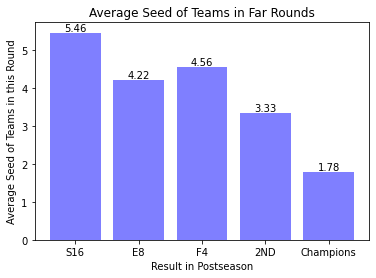

In [27]:
success_seeds = data[data.POSTSEASON >= 'S16'].groupby('POSTSEASON').SEED.mean()
success_seeds = success_seeds[3:8]
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.05, np.round(y[i],2), ha = 'center')
plt.bar(success_seeds.index, success_seeds, color = 'b', alpha = 0.5)
plt.xlabel("Result in Postseason")
plt.ylabel("Average Seed of Teams in this Round")
plt.title("Average Seed of Teams in Far Rounds")
addlabels(success_seeds.index, success_seeds)
plt.show()

With our knowledge that the average seed for high major teams is around 5.9, it makes sense that majority of teams that go far are teams that belong to high major leagues.

### Mid Major Outliers

As we can see in all of our plots, while high major teams dominate postseason consistency, seeding, and success, there still are some mid major teams that have performed well over the last 9 years. 

In [28]:
mm_consistent = mid_major_tourney[mid_major_tourney >= 5]
mm_avg_seed = mid_major_post.groupby('TEAM').SEED.mean()
good_mid_majors = pd.concat([mm_consistent, mm_avg_seed], axis = 1).dropna(axis = 0).rename(columns = 
                {"TOURNEY" : "TOURNAMENT APPEARANCES", "SEED" : "AVERAGE SEED"})

In [29]:
good_mid_majors

,TOURNAMENT APPEARANCES,AVERAGE SEED
TEAM,,
Cincinnati,6.0,6.166667
Gonzaga,9.0,3.333333
Iona,6.0,14.666667
New Mexico St.,7.0,13.000000
San Diego St.,6.0,7.333333
South Dakota St.,5.0,13.200000
Texas Southern,6.0,15.833333
VCU,7.0,7.857143
Wichita St.,7.0,7.571429


Here are all the mid-majors who have made at least 5 tournaments out of the last 9, along with the average seed of each team. 

In [30]:
## Which mid-major teams have success
## Trends in the last 9 years